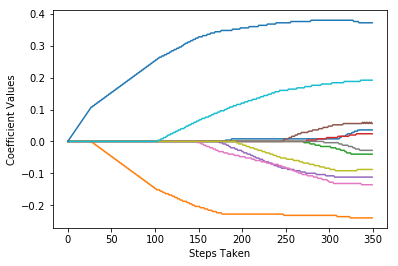

In [2]:
from urllib.request import urlopen
import numpy
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
data = urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    line = line.decode()
    if firstLine:
        names = line.strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)
    
#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)
    
#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#initialize a vector of coefficients beta
beta = [0.0] * ncols
#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

#number of steps to take
nSteps = 350
stepSize = 0.004

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrows
    for j in range(nrows):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncols)])
        residuals[j] = labelNormalized[j] - labelsHat
        
    #calculate correlation between attribute columns from
    #normalized wine and residual
    corr = [0.0] * ncols
    
    for j in range(ncols):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrows)]) / nrows
    iStar = 0
    corrStar = corr[0]
    
    for j in range(1, (ncols)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j; corrStar = corr[j]
    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))

for i in range(ncols):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)
      
plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()